# L1 Regularization

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import deque
from sklearn.utils import shuffle
import pandas as pd 
from sklearn.model_selection import train_test_split

##  Data Generation

In [2]:
np.random.seed(42)
N = 1000
X = np.random.randn(N , 1)
noise = 5 * np.random.randn(N , 1)
y = 1 - 2 * X + X ** 2 - 0.5 * X ** 3 + noise

## Design Matrix Creating - Polynomial mapping 

In [3]:
def polynomial(X, degree):
    phi = deque()
    for k in range(1, degree + 1):
        regressor = X ** k
        phi.append(regressor)
    return np.array(phi).T.reshape((len(X), degree))

phi_x = polynomial(X, 15)

## Test - Train splitting and Normalization

In [4]:
X_train, X_test, y_train, y_test = train_test_split(phi_x, y, test_size=0.2)
one_vectors_tr = np.ones((len(X_train), 1))
one_vector_te = np.ones((len(X_test), 1))
scaler_input = MinMaxScaler().fit(X_train)
X_train, X_test = scaler_input.fit_transform(X_train), scaler_input.fit_transform(X_test)
scaler_output = MinMaxScaler().fit(y_train)
y_train, y_test = scaler_output.fit_transform(y_train), scaler_output.fit_transform(y_test)
X_train, X_test = np.hstack((one_vectors_tr, X_train)), np.hstack((one_vector_te, X_test))

## Least Square Solution

In [5]:
def least_square(X_train, y_train):
    X_T_X_train = np.matmul(X_train.T, X_train)
    X_T_Y_train = np.matmul(X_train.T, y_train)
    W = np.matmul(np.linalg.inv(X_T_X_train), X_T_Y_train)
    return W

## Prediction

In [6]:
def predict(X_test, W):
    y_pre = np.matmul(X_test, W)
    return y_pre

## Metrics

In [7]:
def mse_error(y_pre, y_true):
    error = (y_pre-y_true)**2
    return np.mean(error)

## L1 Regularization

In [8]:
def l1_regularization(X_train, y_train, lr=0.1, l=0.8):
    W = least_square(X_train, y_train)
    i = 0
    while (i == 0):
        print(np.linalg.norm(W, ord=1))
        y_pre = np.matmul(X_train, W)
        error = y_train - y_pre
        dW = -2*np.dot(X_train.T, y_train)/len(X_train) + l*np.sign(W)
        W -= lr*dW
        if np.linalg.norm(W, ord=1) < 1:
            i = 1
            
    return W

[[ 1.90957797e+00]
 [-1.33043351e-01]
 [ 4.38365375e-01]
 [-2.89567615e+00]
 [-3.17177204e+00]
 [-3.44908545e+01]
 [ 2.43916168e+01]
 [ 6.04610494e+02]
 [-4.70758146e+01]
 [-3.25695406e+03]
 [-1.74017260e+02]
 [ 7.98627736e+03]
 [ 6.94501848e+02]
 [-9.13519740e+03]
 [-5.94149285e+02]
 [ 3.93601321e+03]]


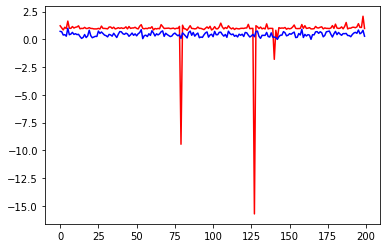

In [9]:
W = least_square(X_train, y_train)
y_pre = predict(X_test, W)
plt.plot(y_pre, 'r')
plt.plot(y_test, 'b')
print(W)

In [10]:
W = l1_regularization(X_train, y_train)
W

26496.227636824842
26494.955258244685
26493.848524265995
26492.632011338002
26491.458122504213
26490.358985482017
26489.171975328558
26488.120986763737
26487.04102731377
26485.972933770052
26484.78385102327
26483.844605291593
26482.643394986073
26481.573490501512
26480.53036913009
26479.42270926202
26478.269579542317
26477.29176124723
26476.144317418122
26475.005452544163
26474.03129156214
26472.86986521766
26471.758265706158
26470.680093905925
26469.64523985017
26468.44796918809
26467.46579374074
26466.3170211733
26465.2673047361
26464.288658000267
26463.382963526878
26462.249649354228
26461.424649123514
26460.380359540795
26459.338703121553
26458.43237033973
26457.43286281611
26456.390571786273
26455.459354499748
26454.484025306425
26453.557960951654
26452.68084219237
26451.77864627789
26450.851494218325
26449.953726346623
26449.06769107206
26448.145404203082
26447.231412564095
26446.35616064519
26445.474311276103
26444.52456333625
26443.625644995867
26442.796763461643
26441.74611794

array([[ 0.05466629],
       [-0.04415054],
       [-0.03399253],
       [ 0.04137537],
       [ 0.00428424],
       [ 0.07426597],
       [-0.00349731],
       [ 0.01031953],
       [ 0.0485983 ],
       [ 0.06757462],
       [ 0.04074132],
       [ 0.33283004],
       [ 0.06577246],
       [-0.05699607],
       [ 0.02256494],
       [ 0.05834554]])

In [59]:
# landa = [0.01, 0.1, 1, 10, 100, 1000]
# mse_tr = []
# mse_te = []
# for k in landa:
#     W = l1_regularization(X_train, y_train, lr=0.1, l=k)
#     y_pre_tr = predict(X_train, W)
#     y_pre_te = predict(X_test, W)
#     mse_tr.append(mse(y_train, y_pre_tr))
#     mse_te.append(mse(y_test, y_pre_te))

# plt.plot(np.log10(landa), mse_tr, 'b-s')
# plt.plot(np.log10(landa), mse_te, 'r-o')

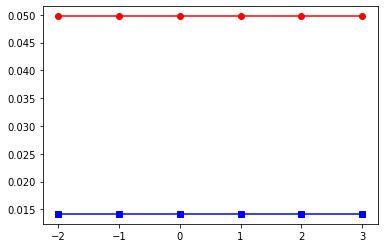

In [11]:
from sklearn.linear_model import Lasso, LinearRegression
lambdaa = [0.01, 0.1, 1, 10, 100, 1000]
mse_tr = []
mse_te = []
for k in lambdaa:
    model = Lasso(alpha=k)
    model.fit(X_train, y_train)
    y_pre_tr = model.predict(X_train)
    y_pre_te = model.predict(X_test)
    mse_tr.append(mse_error(y_train, y_pre_tr))
    mse_te.append(mse_error(y_test, y_pre_te))

plt.plot(np.log10(lambdaa), mse_tr, 'b-s')
plt.plot(np.log10(lambdaa), mse_te, 'r-o')

In [126]:
alpha = 0.00001
model = Lasso(alpha=alpha)
model.fit(X_train, y_train)
model.coef_


array([ 0.        , -0.2688706 ,  0.29275686, -0.9599704 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.14904066,
        0.05087024])